In [15]:
import numpy as np #to work w/#s
import pandas as pd #work w/datasets
import matplotlib.pyplot as plt #helps plot

In [43]:
#Enter patient's data manually (form or input eventually)
right_cimt = 0.632  #thickness of the right carotid artery (in mm)
left_cimt = 0.670   #thickness of the left carotid artery (in mm)
age = 49           #patient's age
sex = "Female"       #patient's sex ["Male" or "Female"]
race = "Black"     #patient's race ["White" or "Black"]
plaques = [2.0, 1.5]  #list of plaque sizes found during scan

In [44]:
#calculate the % range for each CIMT Value

def get_percentile(cimt, sex, race, age):
    #If CIMT is less than .6mm, it is considered low (25th percentile)
    if cimt < 0.6:
        return "≤25th percentile"
    #If CIMT is between .6 and .7 mm, it is considered avg (50th percentile)
    elif cimt < 0.7:
        return "50th percentile"
    #If CIMT is.7 mm or omore, it is considered high avg (75th percentile)
    else:
        return "≥75th percentile"

#use func above to find the percentile for right and left measurements
right_percentile = get_percentile(right_cimt, sex, race, age)
left_percentile = get_percentile(left_cimt, sex, race, age)

In [55]:
#calculate vascular age (biological artery age based on thickness)
#first, get avg of both sides

avg_cimt = (right_cimt + left_cimt) / 2 #add both CIMT values, then divide by 2

#Chart A
chart_A_right = {
    "White Male": {
        25: {"25th": 0.611, "50th": 0.663, "75th": 0.768},
        30: {"25th": 0.636, "50th": 0.702, "75th": 0.807},
        35: {"25th": 0.662, "50th": 0.740, "75th": 0.845},
        40: {"25th": 0.687, "50th": 0.779, "75th": 0.884},
        45: {"25th": 0.534, "50th": 0.617, "75th": 0.714},
        55: {"25th": 0.610, "50th": 0.711, "75th": 0.834},
        65: {"25th": 0.648, "50th": 0.758, "75th": 0.894}
    },
    "White Female": {
        25: {"25th": 0.562, "50th": 0.633, "75th": 0.717},
        30: {"25th": 0.586, "50th": 0.654, "75th": 0.735},
        35: {"25th": 0.611, "50th": 0.676, "75th": 0.754},
        40: {"25th": 0.635, "50th": 0.697, "75th": 0.772},
        45: {"25th": 0.509, "50th": 0.576, "75th": 0.660},
        55: {"25th": 0.575, "50th": 0.676, "75th": 0.760},
        65: {"25th": 0.608, "50th": 0.608, "75th": 0.810}
    },
    "Black Male": {
        25: {"25th": 0.637, "50th": 0.719, "75th": 0.839},
        30: {"25th": 0.675, "50th": 0.756, "75th": 0.884},
        35: {"25th": 0.712, "50th": 0.793, "75th": 0.929},
        40: {"25th": 0.750, "50th": 0.830, "75th": 0.974},
        45: {"25th": 0.514, "50th": 0.604, "75th": 0.700},
        55: {"25th": 0.614, "50th": 0.724, "75th": 0.824},
        65: {"25th": 0.714, "50th": 0.844, "75th": 1.000}
    },
    "Black Female": {
        25: {"25th": 0.616, "50th": 0.682, "75th": 0.750},
        30: {"25th": 0.650, "50th": 0.718, "75th": 0.793},
        35: {"25th": 0.685, "50th": 0.754, "75th": 0.837},
        40: {"25th": 0.719, "50th": 0.790, "75th": 0.880},
        45: {"25th": 0.518, "50th": 0.588, "75th": 0.664},
        55: {"25th": 0.578, "50th": 0.668, "75th": 0.764},
        65: {"25th": 0.638, "50th": 0.748, "75th": 0.864}
    }
}

#Chart A left
chart_A_left = {
    "White Male": {
        25: {"25th": 0.577, "50th": 0.655, "75th": 0.763},
        30: {"25th": 0.617, "50th": 0.707, "75th": 0.814},
        35: {"25th": 0.658, "50th": 0.760, "75th": 0.864},
        40: {"25th": 0.698, "50th": 0.812, "75th": 0.915},
        45: {"25th": 0.556, "50th": 0.641, "75th": 0.748},
        55: {"25th": 0.620, "50th": 0.727, "75th": 0.864},
        65: {"25th": 0.652, "50th": 0.770, "75th": 0.922}
    },
    "White Female": {
        25: {"25th": 0.554, "50th": 0.621, "75th": 0.660},
        30: {"25th": 0.586, "50th": 0.657, "75th": 0.713},
        35: {"25th": 0.618, "50th": 0.693, "75th": 0.766},
        40: {"25th": 0.650, "50th": 0.729, "75th": 0.819},
        45: {"25th": 0.556, "50th": 0.641, "75th": 0.748},
        45: {"25th": 0.506, "50th": 0.580, "75th": 0.660},
        55: {"25th": 0.574, "50th": 0.664, "75th": 0.760},
        65: {"25th": 0.608, "50th": 0.706, "75th": 0.810}
    },
    "Black Male": {
        25: {"25th": 0.640, "50th": 0.736, "75th": 0.794},
        30: {"25th": 0.676, "50th": 0.774, "75th": 0.844},
        35: {"25th": 0.713, "50th": 0.812, "75th": 0.894},
        40: {"25th": 0.749, "50th": 0.850, "75th": 0.944},
        45: {"25th": 0.530, "50th": 0.614, "75th": 0.704},
        55: {"25th": 0.610, "50th": 0.714, "75th": 0.840},
        65: {"25th": 0.690, "50th": 0.814, "75th": 0.976}
    },
    "Black Female": {
        25: {"25th": 0.587, "50th": 0.646, "75th": 0.714},
        30: {"25th": 0.629, "50th": 0.691, "75th": 0.768},
        35: {"25th": 0.670, "50th": 0.736, "75th": 0.822},
        40: {"25th": 0.712, "50th": 0.781, "75th": 0.876},
        45: {"25th": 0.494, "50th": 0.566, "75th": 0.644},
        55: {"25th": 0.558, "50th": 0.646, "75th": 0.748},
        65: {"25th": 0.622, "50th": 0.726, "75th": 0.852}
    }
}

#percentile Lookup Function
def get_cimt_percentile(cimt_value, age, sex, race, side="right"):
    group = f"{race} {sex}"
    chart = chart_A_right if side == "right" else chart_A_left
    closest_age = min(chart[group].keys(), key=lambda x: abs(x - age))
    thresholds = chart[group][closest_age]

    if cimt_value <= thresholds["25th"]:
        return "≤25th percentile"
    elif cimt_value <= thresholds["50th"]:
        return "25th–50th percentile"
    elif cimt_value <= thresholds["75th"]:
        return "50th–75th percentile"
    else:
        return "≥75th percentile"

right_percentile = get_cimt_percentile(right_cimt, age, sex, race, "right")
left_percentile = get_cimt_percentile(left_cimt, age, sex, race, "left")  # simplified reuse

In [56]:
#vascular Age Estimate (from Chart 3, approximated)
def estimate_vascular_age(cimt_avg, sex):
    vascular_age_curve = {
        "Male": {
            0.50: 35, 0.55: 40, 0.60: 45,
            0.65: 50, 0.70: 55, 0.75: 60,
            0.80: 65, 0.85: 70, 0.90: 75
        },
        "Female": {
            0.50: 40, 0.55: 45, 0.60: 50,
            0.65: 55, 0.70: 60, 0.75: 65,
            0.80: 70, 0.85: 75, 0.90: 80
        }
    }
    values = vascular_age_curve[sex]
    closest = min(values.keys(), key=lambda x: abs(cimt_avg - x))
    return values[closest]

vascular_age = estimate_vascular_age(avg_cimt, sex)

In [57]:
#plaque Burden
plaque_burden = sum(p for p in plaques if p >= 1.2)
has_plaque = plaque_burden > 0


In [58]:
#impression Statement
def generate_impression(right_pct, left_pct, has_plaque):
    low = ["≤25th percentile", "25th percentile"]
    high = ["≥75th percentile"]
    
    if not has_plaque and right_pct in low and left_pct in low:
        return "Risk of an adverse cardiovascular event is low based on carotid IMT findings and the absence of athersclerotic plaque. The patient's risk is not elecated above that established by traditional risk factors."
    elif not has_plaque and (right_pct in high or left_pct in high):
        return "Risk of an adverse cardiovascular event is [intermediate/high] based on carotid IMT findings and the absence of atherosclerotic plaque."
    elif has_plaque and (right_pct in low and left_pct in low):
        return "Risk of an adverse cardiovascular event is [low/intermediate/high] based on carotid IMT findings and the presence of atherosclerotic plaque."
    else:
        return "Risk of an adverse cardiovascular event is [low/intermediate/high] based on carotid IMT findings and the presence of atherosclerotic plaque."

impression = generate_impression(right_percentile, left_percentile, has_plaque)

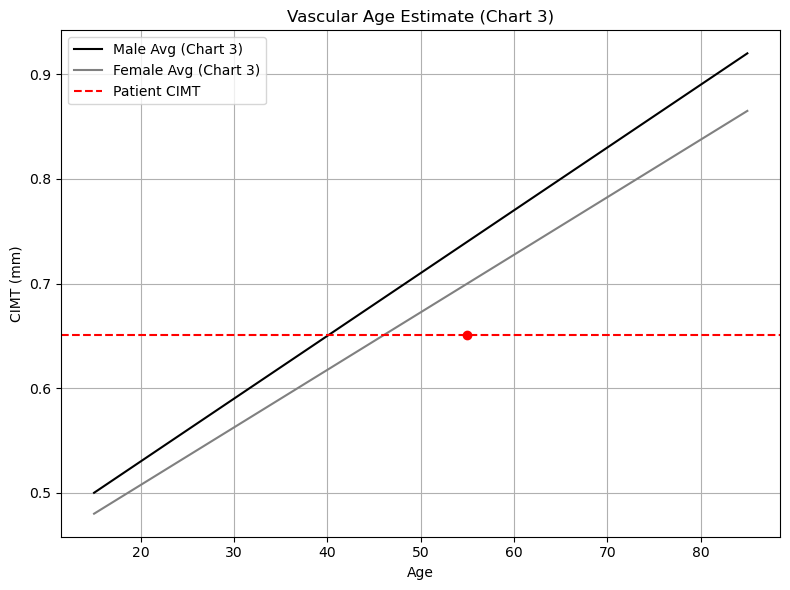

In [59]:
#plot Chart 3 with Patient Dot
ages = np.arange(15, 86, 1)
male_curve = 0.5 + 0.006 * (ages - 15)
female_curve = 0.48 + 0.0055 * (ages - 15)

plt.figure(figsize=(8, 6))
plt.plot(ages, male_curve, label="Male Avg (Chart 3)", color="black")
plt.plot(ages, female_curve, label="Female Avg (Chart 3)", color="gray")
plt.axhline(avg_cimt, color="red", linestyle="--", label="Patient CIMT")
plt.scatter(vascular_age, avg_cimt, color="red", zorder=5)
plt.title("Vascular Age Estimate (Chart 3)")
plt.xlabel("Age")
plt.ylabel("CIMT (mm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
#print Report Summary
print("CIMT Risk Report")
print(f"Right CIMT: {right_cimt} mm → {right_percentile}")
print(f"Left CIMT: {left_cimt} mm → {left_percentile}")
print(f"Average CIMT: {avg_cimt:.2f} mm")
print(f"Estimated Vascular Age: {vascular_age} years (General: {sex})")
print(f"Plaque Burden: {plaque_burden:.2f} mm")

print("\nImpression:")
print(impression)

print("\nNote:")
print("There is a 95% correlation between the carotid and coronary arteries for presence of plaque, "
      "but not 100%. If the patient has risk factors for heart disease, consider further testing such as "
      "a coronary calcium score CT.")

CIMT Risk Report
Right CIMT: 0.632 mm → 50th–75th percentile
Left CIMT: 0.67 mm → ≥75th percentile
Average CIMT: 0.65 mm
Estimated Vascular Age: 55 years (General: Female)
Plaque Burden: 3.50 mm

Impression:
Risk of an adverse cardiovascular event is [low/intermediate/high] based on carotid IMT findings and the presence of atherosclerotic plaque.

Note:
There is a 95% correlation between the carotid and coronary arteries for presence of plaque, but not 100%. If the patient has risk factors for heart disease, consider further testing such as a coronary calcium score CT.
